In [80]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates 

In [5]:
import numpy as np
import pandas as pd

In [7]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [9]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [11]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
Base = automap_base()
Base.prepare(engine, reflect=True)


In [13]:
# reflect an existing database into a new model
# reflect the table
Base.prepare(engine, reflect=True)


In [15]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [17]:
# Save references to each table
Msmt = Base.classes.measurement
Stn = Base.classes.station


In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)



In [21]:
# Display first row of measurement in a dictionary format
first_row =session.query(Msmt).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1df44f3b940>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'station': 'USC00519397',
 'prcp': 0.08,
 'id': 1}

In [23]:
# Display first row of station in a dictionary format
first_row =session.query(Stn).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1df44f3bba8>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

# Exploratory Climate Analysis

In [25]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

# The last date

last_date = session.query(Msmt.date).order_by(Msmt.date.desc()).first()
last_date


('2017-08-23')

In [27]:
# Calculate the date 1 year ago from the last data point in the database
first_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(first_date)

2016-08-23


In [97]:
# Perform a query to retrieve the data and precipitation scores
# result = session.query(Msmt.date, Msmt.prcp).filter(Msmt.date.between(first_date, last_date))
sel = [Msmt.date,Msmt.prcp]
data = session.query(*sel).filter(Msmt.date.between('2016-08-23', '2017-08-23'))

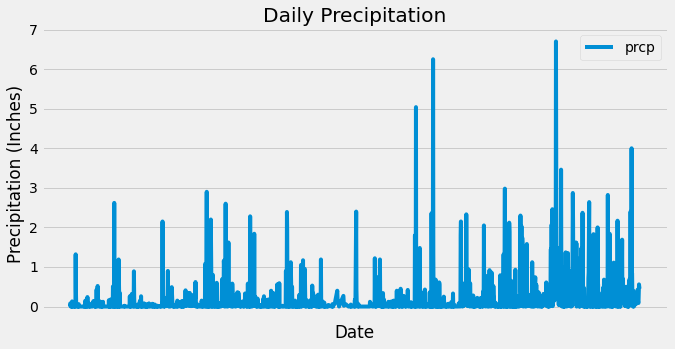

[]

In [99]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# index = pd.date_range(start = "2016-08-23", end = "2017-08-23", freq = "D")
# index = [pd.to_datetime(date, format='%Y-%m-%d').date() for date in index]

prcp_df = pd.DataFrame(data)
index = prcp_df['date']
index = [pd.to_datetime(date, format='%Y-%m-%d').date() for date in index]

# prcp_df.set_index('date')
# prcp_df.sort_index()
prcp_df = prcp_df.dropna()

prcp_df

ax = prcp_df.plot(figsize=(10,5),grid=True)


ax.set(xlabel="Date", ylabel="Precipitation (Inches)",
       title="Daily Precipitation")


# xaxis = np.arange(len(prcp_df))
plt.style.use('fivethirtyeight')
# ax = prcp_df.plot(figsize=(10,5),grid=True)


#Create custom ticks using matplotlib date tick locator and formatter
# loc = mdates.MonthLocator(interval=2)
# ax.xaxis.set_major_locator(loc)
# fmt = mdates.DateFormatter('%b\n%Y')
# ax.xaxis.set_major_formatter(fmt)

ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=2))
ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))

# plt.xlim(0, len(x_axis))
# plt.ylabel('Inches')
# plt.savefig('Images/precipation.png', dpi=None, facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None, metadata=None)


plt.show()
ax.get_xticks()

In [33]:


# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [35]:
# Design a query to show how many stations are available in this dataset?
total_station = session.query(func.count(Stn.station)).all()
total_station



[(9)]

In [87]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
# session.query(func.count(Msmt.station)).group_by(Msmt.station).all()
engine.execute('SELECT station, COUNT(*) AS "stn_count" FROM measurement GROUP BY station ORDER BY "stn_count" DESC').fetchall()



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [90]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

readings = session.query(func.min(Msmt.tobs).label('Minimum Temperature'),\
    func.max(Msmt.tobs).label('Maximum Temperature'),\
        func.avg(Msmt.tobs).label('Average Temprature')).filter(Msmt.station=='USC00519281').all()

readings

# sel = [Dow.stock, 
#        func.avg(Dow.open_price), 
#        func.avg(Dow.high_price), 
#        func.avg(Dow.low_price), 
#        func.avg(Dow.close_price)]
# may_averages = session.query(*sel).\
#     filter(func.strftime("%m", Dow.date) == "05").\
#     group_by(Dow.stock).\
#     order_by(Dow.stock).all()
# may_averages


[(54.0, 85.0, 71.66378066378067)]

In [126]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp = [Msmt.tobs, func.count(Msmt.tobs)]
result = session.query(*temp).filter(
    Msmt.date.between('2016-08-23', '2017-08-23'),
    Msmt.station=='USC00519281').group_by(Msmt.tobs).order_by(func.count(Msmt.tobs).desc()).all()
    
 
Temp_df = pd.DataFrame(result) 

Temp_df



ValueError: 1 columns passed, passed data had 2 columns

## Bonus Challenge Assignment

In [43]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Msmt.tobs), func.avg(Msmt.tobs), func.max(Msmt.tobs)).\
        filter(Msmt.date >= start_date).filter(Msmt.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [45]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2011-02-28', '2011-03-05'))


[(61.0, 69.75510204081633, 75.0)]


In [47]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [48]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

NameError: name 'Measurement' is not defined

In [50]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [51]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [52]:
# Plot the daily normals as an area plot with `stacked=False`
